In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
%matplotlib inline

In [3]:
donations=pd.read_pickle('donations_cohort_with_cycle.pkl')

In [28]:
donations_13to17=pd.read_pickle('donations_13to17.pkl')

In [39]:
for col in donations_13to17.columns:
    print(col)

id
first_gift_year
lapsed_count
recovered_count
max_consec_giving_years
total_giving_years
count_2013
count_2014
count_2015
count_2016
count_2017
count_yr0
count_yr1
count_yr2
count_yr3
count_yr4
lapsed_amount
recovered_amount
amount_2013
amount_2014
amount_2015
amount_2016
amount_2017
lapsed_amount_2013
lapsed_amount_2014
lapsed_amount_2015
lapsed_amount_2016
lapsed_amount_2017
upgraded_amount_2013
upgraded_amount_2014
upgraded_amount_2015
upgraded_amount_2016
upgraded_amount_2017
downgraded_amount_2013
downgraded_amount_2014
downgraded_amount_2015
downgraded_amount_2016
downgraded_amount_2017
amount_yr0
amount_yr1
amount_yr2
amount_yr3
amount_yr4
lapsed_amount_yr0
lapsed_amount_yr1
lapsed_amount_yr2
lapsed_amount_yr3
lapsed_amount_yr4
upgraded_amount_yr0
upgraded_amount_yr1
upgraded_amount_yr2
upgraded_amount_yr3
upgraded_amount_yr4
downgraded_amount_yr0
downgraded_amount_yr1
downgraded_amount_yr2
downgraded_amount_yr3
downgraded_amount_yr4
amount_01_2013
amount_02_2013
amount_03_201

In [33]:
donations_13to17.behavior_2013.value_counts()

none    1556399
new      320069
Name: behavior_2013, dtype: int64

### explore distribution of amounts

In [6]:
donations.query('amount_yr0 > 0').describe()['amount_yr0'].round()

count    2024554.0
mean          85.0
std          691.0
min            0.0
25%           25.0
50%           49.0
75%           75.0
max       634710.0
Name: amount_yr0, dtype: float64

In [7]:
donations.query('amount_yr1 > 0').describe()['amount_yr1'].round()

count    243436.0
mean        190.0
std        2024.0
min           1.0
25%          25.0
50%          50.0
75%         125.0
max      570162.0
Name: amount_yr1, dtype: float64

In [8]:
donations.query('amount_yr2 > 0').describe()['amount_yr2'].round()

count    124288.0
mean        236.0
std        2740.0
min           1.0
25%          25.0
50%          54.0
75%         150.0
max      581682.0
Name: amount_yr2, dtype: float64

In [9]:
donations.query('amount_yr3 > 0').describe()['amount_yr3'].round()

count     68920.0
mean        284.0
std        2600.0
min           1.0
25%          30.0
50%          74.0
75%         185.0
max      315941.0
Name: amount_yr3, dtype: float64

In [11]:
donations.query('amount_yr4 > 0').describe()['amount_yr4'].round()

count     36668.0
mean        356.0
std        2669.0
min           1.0
25%          35.0
50%          86.0
75%         216.0
max      254645.0
Name: amount_yr4, dtype: float64

In [21]:
print(donations.query('amount_yr0 > 0').amount_yr0.value_counts(normalize=True).round(2))
print(donations.query('amount_yr1 > 0').amount_yr1.value_counts(normalize=True).round(2))
print(donations.query('amount_yr2 > 0').amount_yr2.value_counts(normalize=True).round(2))
print(donations.query('amount_yr3 > 0').amount_yr3.value_counts(normalize=True).round(2))
print(donations.query('amount_yr4 > 0').amount_yr4.value_counts(normalize=True).round(2))

25.00      0.23
50.00      0.21
100.00     0.09
10.00      0.09
20.00      0.07
           ... 
1049.64    0.00
317.97     0.00
213.57     0.00
711.39     0.00
341.20     0.00
Name: amount_yr0, Length: 63641, dtype: float64
50.00      0.16
25.00      0.15
100.00     0.08
10.00      0.07
20.00      0.04
           ... 
241.88     0.00
1514.78    0.00
434.14     0.00
759.16     0.00
120.67     0.00
Name: amount_yr1, Length: 33429, dtype: float64
50.00      0.16
25.00      0.15
100.00     0.09
10.00      0.05
20.00      0.04
           ... 
520.16     0.00
65.57      0.00
26.04      0.00
147.08     0.00
1013.64    0.00
Name: amount_yr2, Length: 22186, dtype: float64
50.00      0.15
25.00      0.13
100.00     0.08
20.00      0.04
10.00      0.04
           ... 
1484.00    0.00
333.82     0.00
122.16     0.00
14.33      0.00
60.32      0.00
Name: amount_yr3, Length: 15348, dtype: float64
50.00      0.14
25.00      0.11
100.00     0.07
10.00      0.04
20.00      0.04
           ... 
856.31  

In [29]:
conditions=[(donations['amount_yr0'] <= 25),
            (donations['amount_yr0'] > 25) & (donations['amount_yr0'] <= 50),
            (donations['amount_yr0'] > 50) & (donations['amount_yr0'] <= 100),
            (donations['amount_yr0'] > 100) & (donations['amount_yr0'] <= 1000),
            (donations['amount_yr0'] > 1000)]
    
choices=['under25', '25to50', '50to100', '100to1000', 'over1000']

donations.loc[:,'yr0_amount_groups']=np.select(conditions, choices, default='none')
    

In [30]:
donations.yr0_amount_groups.value_counts()

under25      895577
25to50       537804
50to100      323635
100to1000    255433
over1000      12105
Name: yr0_amount_groups, dtype: int64

In [74]:
#create dataframes by year with amounts > 0
donations_2013=donations_13to17.query('amount_2013 > 0')
donations_2014=donations_13to17.query('amount_2014 > 0')
donations_2015=donations_13to17.query('amount_2015 > 0')
donations_2016=donations_13to17.query('amount_2016 > 0')
donations_2017=donations_13to17.query('amount_2017 > 0')

In [75]:
donations_2014a=donations_2014[['id', 'first_gift_year', 'gift_pattern', 'amount_2014', 'behavior_2014', 'count_2014', 'gainloss_2014', 'gainloss_2014_amt']].copy()

In [52]:
donations_2015a=donations_2015[['id', 'first_gift_year', 'gift_pattern', 'amount_2015', 'behavior_2015', 'count_2015', 'gainloss_2015', 'gainloss_2015_amt']].copy()

In [41]:
donations_2013.gift_pattern.value_counts()

1,            227808
1,2,           28817
1,3,           10390
1,2,3,4,5,      9878
1,2,3,          9423
1,4,            6773
1,5,            5010
1,2,3,4,        4442
1,2,4,          3075
1,3,4,          2412
1,2,3,5,        2337
1,2,5,          2196
1,4,5,          2195
1,2,4,5,        1962
1,3,4,5,        1898
1,3,5,          1453
Name: gift_pattern, dtype: int64

In [57]:
donations_2015b=donations_2015a.groupby(['behavior_2015', "gift_pattern"]).count()['id'].reset_index()

In [76]:
donations_2014b=donations_2014a.groupby(['behavior_2014', "gift_pattern"]).count()['id'].reset_index()

In [82]:
donations_2015c=pd.melt(donations_2015b, id_vars =['gift_pattern', 'id'], value_vars =['behavior_2015'], 
              var_name ='yr_donated', value_name ='behavior') 

In [83]:
donations_2014c=pd.melt(donations_2014b, id_vars =['gift_pattern', 'id'], value_vars =['behavior_2014'], 
              var_name ='yr_donated', value_name ='behavior') 

In [85]:
donations_2015c.rename(columns={'id': 'no_donors'}, inplace=True)

In [86]:
frames = [donations_2014c, donations_2015c]

result = pd.concat(frames)

In [96]:
result1=result.groupby(['yr_donated', 'behavior']).sum().reset_index()

In [97]:
fig = px.bar(result1, x="yr_donated", y='no_donors', color='behavior',
            title="",
            #color_discrete_sequence =['seagreen','red']
            )
 #barmode='group', labels={'index':'year', 'y':'amount ($)'}, 
#fig.update_xaxes(type='category')
fig.show()

In [49]:
donations_2014a.behavior_2014.value_counts()

new          320673
upgrade       27112
downgrade     23847
maintain      11171
Name: behavior_2014, dtype: int64

In [43]:
donations_2014.gift_pattern.value_counts()

2,            248000
1,2,           28817
2,3,           28755
2,4,           11850
1,2,3,4,5,      9878
1,2,3,          9423
2,5,            8220
2,3,4,5,        7961
2,3,4,          7778
1,2,3,4,        4442
2,3,5,          4173
2,4,5,          3936
1,2,4,          3075
1,2,3,5,        2337
1,2,5,          2196
1,2,4,5,        1962
Name: gift_pattern, dtype: int64

In [44]:
donations_2014.behavior_2014.value_counts()

new          320673
upgrade       27112
downgrade     23847
maintain      11171
Name: behavior_2014, dtype: int64

In [9]:
# sns.distplot(donations_2013['amount_2013'], kde=False, bins=20)
# plt.yscale('log')

In [10]:
# fig = px.histogram(donations_2013, x="amount_2013", nbins=100, log_y=True)
# fig.show()

In [19]:
donations_2013.amount_2013.sum()

30428184.740000002

In [11]:
#largest donors in 2013
donations_2013.amount_2013.nlargest(n=10)

1272370    442794.38
1134594    163192.85
111119     113360.94
1192540     94901.50
263317      90140.60
754489      84649.77
72931       82353.47
679515      54284.03
559864      47123.28
112596      41080.02
Name: amount_2013, dtype: float64

In [12]:
#percent contributed by top x donors in 2013
donations_2013.amount_2013.nlargest(n=3).sum()/donations_2013.amount_2013.sum()*100

2.3640850617498907

In [13]:
# total contributed in 2013
donations_2013.amount_2013.sum()

30428184.740000002

In [14]:
donations_2013.query('amount_2013 == 442794.38')

,id,first_gift_year,lapsed_count,recovered_count,max_consec_giving_years,total_giving_years,count_2013,count_2014,count_2015,count_2016,...,amount_total,count_total,cohort_gift_pattern,cohort_yr0_TF,cohort_yr1_TF,cohort_yr2_TF,cohort_yr3_TF,cohort_yr4_TF,first_gift_year_year,cohort
1272370,a0e1d358aa17745ff3d3f4e4909356f3,2013-01-01,6,6,6,6,5322,1986,1214,1234,...,1836958.08,10381,"0,1,2,3,4,",T,TT,TTT,TTTT,TTTTT,2013,cohort13


In [ ]:
donations_2013.columns

### explore distribution of donation counts

In [20]:
count_df=donations_2013.copy()
#count_df=donations_2014.copy()
#count_df=donations_2015.copy()
#count_df=donations_2016.copy()
#count_df=donations_2017.copy()

count_df.rename(columns={
'count_2013':'count_col', 'amount_2013':'amount_col'},
#    'count_2014':'count_col', 'amount_2014':'amount_col'},
#    'count_2015':'count_col', 'amount_2015':'amount_col'},
#    'count_2016':'count_col', 'amount_2016':'amount_col'},
#'count_2017':'count_col', 'amount_2017':'amount_col'},
                inplace = True) 

In [21]:
# number of donors in year
print(f'# donors: ', "{:,}".format(count_df['id'].count()))

# amount donations in year
print(f'amount of donations: ', "${:,.0f}".format(count_df['amount_col'].sum()))

# max # donations in year
print(f'max number donations: ', count_df['count_col'].max())

print(f'10 highest numbers of donation: ', count_df['count_col'].nlargest(n=50))

# donors:  320,102
amount of donations:  $30,428,185
max number donations:  7430
10 highest numbers of donation:  881728     7430
1272370    5322
112596     2297
280973     2264
1327678    1736
1277870    1455
31744      1315
277652     1130
1388889    1109
861857     1014
536544      998
1043900     995
1250084     957
1888487     866
1925591     861
868926      860
1208227     806
984437      793
840329      758
847043      752
509713      748
753027      728
1506727     693
948005      657
785865      646
797085      646
111119      630
383715      609
1244869     567
1662730     523
982437      509
129507      507
319739      506
580282      497
1066609     496
995181      491
142041      485
493084      477
586924      474
767827      463
927063      456
266704      453
826147      432
210196      430
544444      429
603497      423
665293      421
1231641     414
1299953     409
4893        396
Name: count_col, dtype: int64


In [140]:
donations_2017.query('count_2017 == 13751')

,id,first_gift_year,lapsed_count,recovered_count,max_consec_giving_years,total_giving_years,count_2013,count_2014,count_2015,count_2016,...,gainloss_2013,gainloss_2014,gainloss_2015,gainloss_2016,gainloss_2017,gainloss_2014_amt,gainloss_2015_amt,gainloss_2016_amt,gainloss_2017_amt,count_category
2508,39df9399f5384334a42905bcf0acdcbf,2016-01-01,3,3,3,3,0,0,0,3082,...,none,none,none,gain,gain,0.0,0.0,4037.99,21438.1,>13x


In [22]:
# donors by # contributions
l = 12
for n in range(1,l+1,1):
    if n < l + 1:
        count=count_df.loc[count_df['count_col'] == n]
        print(n, f'/',
              "{:,}".format(count.count_col.count()), f'/',
              "{:.2%}".format(count.count_col.count()/count_df.count_col.count()), f'/',
             "${:,.0f}".format(count.amount_col.sum()), f'/',
             "{:.2%}".format(count.amount_col.sum()/count_df.amount_col.sum()))

1 / 256,504 / 80.13% / $13,159,895 / 43.25%
2 / 36,158 / 11.30% / $4,761,850 / 15.65%
3 / 11,230 / 3.51% / $2,290,112 / 7.53%
4 / 5,230 / 1.63% / $1,489,305 / 4.89%
5 / 2,882 / 0.90% / $944,309 / 3.10%
6 / 1,791 / 0.56% / $752,623 / 2.47%
7 / 1,198 / 0.37% / $544,162 / 1.79%
8 / 879 / 0.27% / $448,520 / 1.47%
9 / 635 / 0.20% / $383,236 / 1.26%
10 / 522 / 0.16% / $279,019 / 0.92%
11 / 456 / 0.14% / $299,094 / 0.98%
12 / 317 / 0.10% / $211,324 / 0.69%


In [ ]:
# number who contributed greater than 12 times
print(f'# donors contributed > 12x: ', count_df.loc[count_df['count_col'] > 12].count()['id'])

# amount donated who contributed greater than 12 times
print(f'amount: ', "${:,.0f}".format(count_df.loc[count_df['count_col'] > 12].sum()['amount_col']))

In [23]:
#assign count categories
conditions = [(donations_2013['count_2013'] == 1),           
              ((donations_2013 ['count_2013'] > 1) & (donations_2013['count_2013'] < 13)),
              (donations_2013['count_2013'] > 12)]
              
choices = ['1x', '2-12x', '>13x']

donations_2013.loc[:,'count_category'] = np.select(conditions, choices, default='none')

#assign count categories
conditions = [(donations_2014['count_2014'] == 1),           
              ((donations_2014 ['count_2014'] > 1) & (donations_2014['count_2014'] < 13)),
              (donations_2014['count_2014'] > 12)]
              
choices = ['1x', '2-12x', '>13x']

donations_2014.loc[:,'count_category'] = np.select(conditions, choices, default='none')

#assign count categories
conditions = [(donations_2015['count_2015'] == 1),           
              ((donations_2015 ['count_2015'] > 1) & (donations_2015['count_2015'] < 13)),
              (donations_2015['count_2015'] > 12)]
              
choices = ['1x', '2-12x', '>13x']

donations_2015.loc[:,'count_category'] = np.select(conditions, choices, default='none')

#assign count categories
conditions = [(donations_2016['count_2016'] == 1),           
              ((donations_2016 ['count_2016'] > 1) & (donations_2016['count_2016'] < 13)),
              (donations_2016['count_2016'] > 12)]
              
choices = ['1x', '2-12x', '>13x']

donations_2016.loc[:,'count_category'] = np.select(conditions, choices, default='none')

#assign count categories
conditions = [(donations_2017['count_2017'] == 1),           
              ((donations_2017 ['count_2017'] > 1) & (donations_2017['count_2017'] < 13)),
              (donations_2017['count_2017'] > 12)]
              
choices = ['1x', '2-12x', '>13x']

donations_2017.loc[:,'count_category'] = np.select(conditions, choices, default='none')

C:\Users\erinm\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\erinm\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
donations_2013.count_category.value_counts()

1x       256504
2-12x     61298
>13x       2300
Name: count_category, dtype: int64

In [25]:
#create dataframes with 1x/year donors
donations_2013_1x=donations_2013.query('count_category == "1x"')
donations_2014_1x=donations_2014.query('count_category == "1x"')
donations_2015_1x=donations_2015.query('count_category == "1x"')
donations_2016_1x=donations_2016.query('count_category == "1x"')
donations_2017_1x=donations_2017.query('count_category == "1x"')

In [136]:
donations_2016_1x.groupby('count_total').count()['id']

count_total
1       342960
2        56160
3        20025
4         9403
5         5362
         ...  
317          1
324          1
461          1
656          1
1795         1
Name: id, Length: 116, dtype: int64

In [7]:
### category 2: tenure
#### composition by year

In [27]:
donations_2013_1x.columns

Index(['id', 'first_gift_year', 'lapsed_count', 'recovered_count',
       'max_consec_giving_years', 'total_giving_years', 'count_2013',
       'count_2014', 'count_2015', 'count_2016',
       ...
       'count_total', 'cohort_gift_pattern', 'cohort_yr0_TF', 'cohort_yr1_TF',
       'cohort_yr2_TF', 'cohort_yr3_TF', 'cohort_yr4_TF',
       'first_gift_year_year', 'cohort', 'count_category'],
      dtype='object', length=195)

In [26]:
donations_2013_1x.behavior_2013.value_counts()

AttributeError: 'DataFrame' object has no attribute 'behavior_2013'

In [41]:
donations_2016_1x.behavior_2016.value_counts()

new          379135
recover       22076
downgrade     21132
upgrade       12496
maintain      10927
Name: behavior_2016, dtype: int64

In [110]:
donations_2013_1x.count_2013.count()

256485

In [113]:
d13=donations_2013_1x[['id','behavior_2013']].copy()
d13=d13.groupby('behavior_2013').count().reset_index()
d13['year']= 2013
d13['count_percentage'] = d13['id']/(donations_2013_1x['count_2013'].count())
d13.rename(columns = {'id':'count','behavior_2013':'behavior'}, inplace = True) 
d13.style.format({'count_percentage': '{:,.2%}'.format})


d14=donations_2014_1x[['id','behavior_2014']].copy()
d14=d14.groupby('behavior_2014').count().reset_index()
d14['year']= 2014
d14['count_percentage'] = d14['id']/donations_2014_1x.count_2014.count()
d14.rename(columns = {'id':'count','behavior_2014':'behavior'}, inplace = True) 
d14.style.format({'count_percentage': '{:,.2%}'.format})

d15=donations_2015_1x[['id','behavior_2015']].copy()
d15=d15.groupby('behavior_2015').count().reset_index()
d15['year']= 2015
d15['count_percentage'] = d15['id']/donations_2015_1x.count_2015.count()
d15.rename(columns = {'id':'count','behavior_2015':'behavior'}, inplace = True) 
d15.style.format({'count_percentage': '{:,.2%}'.format})

d16=donations_2016_1x[['id','behavior_2016']].copy()
d16=d16.groupby('behavior_2016').count().reset_index()
d16['year']= 2016
d16['count_percentage'] = d16['id']/donations_2016_1x.count_2016.count()
d16.rename(columns = {'id':'count','behavior_2016':'behavior'}, inplace = True) 
d16.style.format({'count_percentage': '{:,.2%}'.format})

d17=donations_2017_1x[['id','behavior_2017']].copy()
d17=d17.groupby('behavior_2017').count().reset_index()
d17['year']= 2017
d17['count_percentage'] = d17['id']/donations_2017_1x.count_2017.count()
d17.rename(columns = {'id':'count','behavior_2017':'behavior'}, inplace = True) 
d17.style.format({'count_percentage': '{:,.2%}'.format})

,behavior,count,year,count_percentage
0,downgrade,26852,2017,6.14%
1,maintain,12752,2017,2.92%
2,new,356464,2017,81.56%
3,recover,28449,2017,6.51%
4,upgrade,12558,2017,2.87%


In [117]:
all = d13.append([d14,d15,d16,d17], sort=False)

In [126]:
all_n = all.reset_index(drop=True).style.format({'count_percentage':'{:,.2%}'.format})

In [133]:
all_n.head()

AttributeError: 'Styler' object has no attribute 'head'

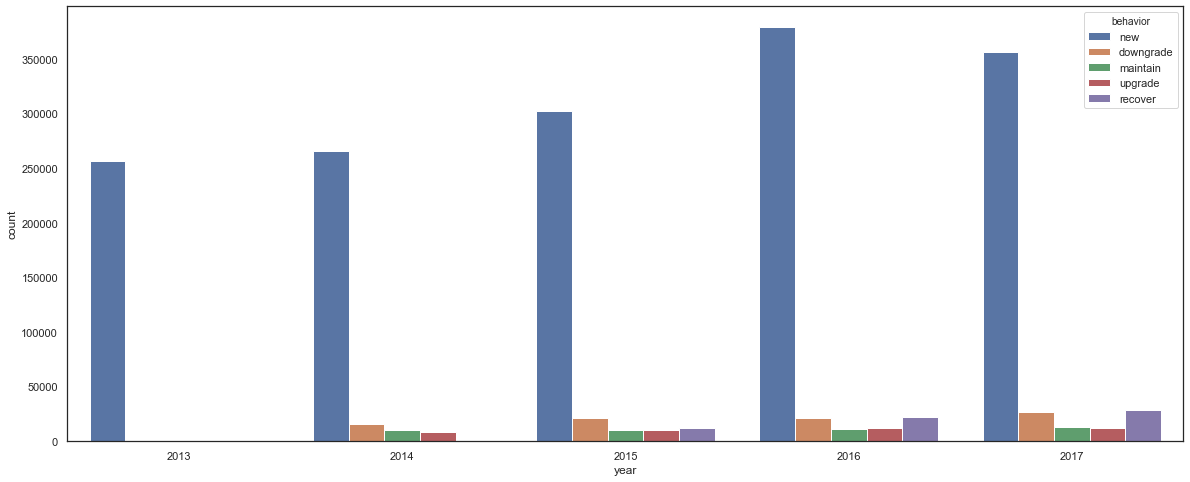

In [80]:
plt.figure(figsize=(20,8))
sns.barplot(x='year', y="count", hue="behavior", data=all);

In [128]:
plt.figure(figsize=(20,8))
sns.lmplot(x='year', y="count", hue="behavior", data=all_n)

TypeError: 'Styler' object is not subscriptable

<Figure size 1440x576 with 0 Axes>

In [135]:
fig = px.bar(all, x="year", y="count_percentage",
             color='behavior', barmode='group',
             height=400)
fig.write_html("behavior_by_year.html")
fig.show()

In [82]:
iplot([go.Histogram2dContour(x=x, y=y, contours=dict(coloring='heatmap')),
      go.Scatter(x=x, y=y, mode='markers', marker=dict(color='white', size=3, opacity=.3))], show_link=False)

In [ ]:
sns.distplot(donations_2013['count_2013'], kde=False, bins=20)
sns.distplot(donations_2014['count_2014'], kde=False, bins=20)
plt.yscale('log')

In [ ]:
#fig, axes = plt.subplots(nrows=2, ncols=2)

#sns.distplot(donations_2013['count_2013'], kde=False, bins=20, ax=axes[0,0], plt.yscale=log)

#sns.distplot(donations_2014['count_2014'], kde=False, bins=20, ax=axes[0,1])

fig = plt.figure()
fig.add_subplot(221)   #top left
sns.distplot(donations_2013['count_2013'], kde=False, bins=20, ax=axes[0,0])

fig.add_subplot(222)   #top right
fig.add_subplot(223)   #bottom left
fig.add_subplot(224)   #bottom right 
plt.show()


In [ ]:
gr1_2013=donations_2013.query('count_2013 > 1')

In [ ]:
gr1_2013.shape

In [ ]:
fig = px.histogram(donations_2014, x="count_2014", color='behavior_2014', title="# of donations per donor", labels="donations", nbins=50, log_y=True)
fig.show()

In [ ]:
bins, counts = np.histogram(donations_2013.count_2013)


fig = px.bar(x=bins, y=counts, labels={'x':'# donations', 'y':'count'})
fig.show()

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
#ax.yscale('log')
#ax.set_xscale("log", nonposx='clip')

sns.distplot( donations_2013['count_2013'], color="skyblue", ax=axes[0, 0], bins=20)
#plt.yscale('log')
sns.distplot( donations_2014['count_2014'] , color="olive", ax=axes[0, 1], bins=20)
sns.distplot( donations_2015['count_2015']  , color="gold", ax=axes[1, 0], bins=20)
sns.distplot( donations_2016['count_2016']  , color="teal", ax=axes[1, 1], bins=20)

In [ ]:
donations_2017.count_2017.describe()

In [ ]:
donations_2013.head()

In [ ]:
px.histogram(data_frame=donations_2014
             ,x="count_2014"
             #,y="Name"
             ,color="behavior_2014"
             ,histfunc="count"
             ,title="Distribution of Heroes, by Publisher | Good-Bad-Neutral"
             ,labels={'Name':'Characters'}
             ,template='plotly_white'
             ,nbins=20
             ,log_y=True
            )

In [ ]:
counts, bins = np.histogram(donations_2013.count_2013, bins=range(1, 102, 1))
bins = .5*(bins[:-1] + bins[1:])-.5

fig = px.bar(x=bins, y=counts, labels={'x':'# donations', 'y':'# donors'},log_y=True)
fig.show()

In [ ]:
counts, bins = np.histogram(donations_2014.count_2014, bins=range(1, 102, 1))
bins = .5*(bins[:-1] + bins[1:])-.5

fig = px.bar(x=bins, y=counts, labels={'x':'# donations', 'y':'# donors'},log_y=True)
fig.show()